In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
em_tracked = np.load('em_tracked.npy')

In [19]:
trajectory = em_tracked[:, 0]

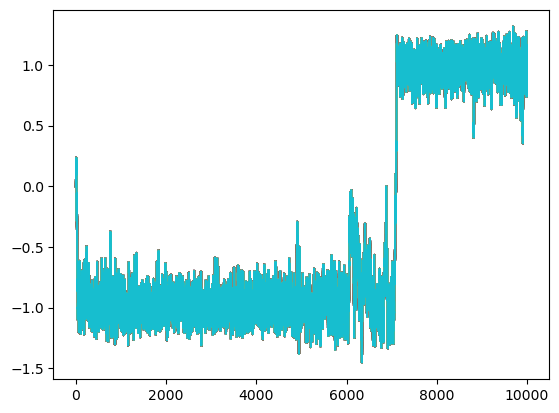

In [34]:
for i in range(em_tracked.shape[1]):
    plt.plot(em_tracked[:, i])

100

In [38]:
np.allclose(em_tracked[:, 0],em_tracked[:, 2])

True